RMSE: 1086.03, R²: -1.373


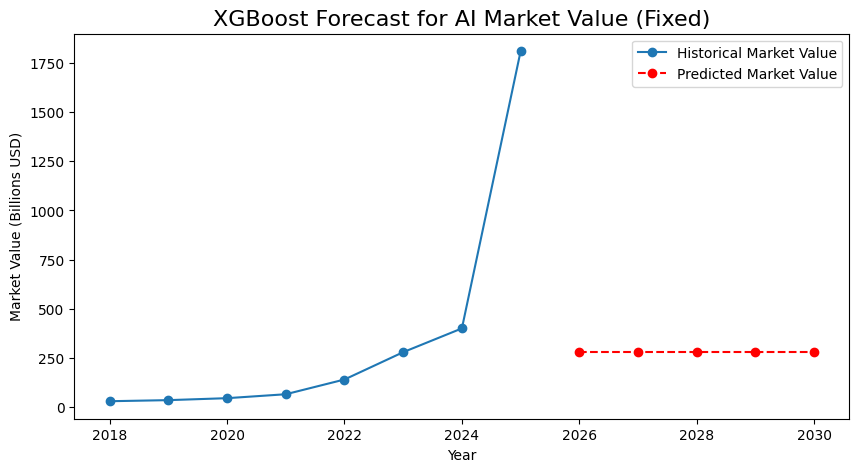

Corrected forecast saved to XGBoost_AI_Forecast.csv


In [4]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# =========================
# 1. Load merged dataset
# =========================
df = pd.read_csv('../data/processed/AI_rise_and_popularity.csv')

# Ensure Year is numeric
if df['Year'].dtype != 'int64' and df['Year'].dtype != 'int32':
    df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year

df['Year'] = df['Year'].astype(int)

# Features and target
X = df[['Year', 'AI_Adoption', 'Popularity_Score']]
y = df['Market_Value']

# =========================
# 2. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# =========================
# 3. Train XGBoost Model
# =========================
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# =========================
# 4. Evaluate
# =========================
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, R²: {r2:.3f}")

# =========================
# 5. Predict Next 5 Years
# =========================
last_year = int(df['Year'].max())
future_years = [last_year + i for i in range(1, 6)]

# Assume AI_Adoption and Popularity grow linearly
ai_adoption_growth = df['AI_Adoption'].iloc[-1]
popularity_growth = df['Popularity_Score'].iloc[-1]

future_data = pd.DataFrame({
    'Year': future_years,
    'AI_Adoption': [ai_adoption_growth + (i+1)*2 for i in range(5)],  # +2% per year assumption
    'Popularity_Score': [popularity_growth + (i+1)*5 for i in range(5)]  # +5 units per year assumption
})

future_preds = model.predict(future_data)

# =========================
# 6. Visualization
# =========================
plt.figure(figsize=(10,5))
plt.plot(df['Year'], y, marker='o', label='Historical Market Value')
plt.plot(future_years, future_preds, marker='o', linestyle='dashed', color='red', label='Predicted Market Value')
plt.title('XGBoost Forecast for AI Market Value (Fixed)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Value (Billions USD)')
plt.legend()
plt.show()

# =========================
# 7. Save Predictions
# =========================
pd.DataFrame({'Year': future_years, 'Predicted Market Value': future_preds}).to_csv('XGBoost_AI_Forecast.csv', index=False)
print('Corrected forecast saved to XGBoost_AI_Forecast.csv')